# EVALUATION DU MODULE 8 : HIDDEN MARKOV MODEL
Mame-Mor FALL CES Data Science 2016

Ce TP se déroule en deux parties. La première partie concerne les chaînes de Markov et est à finir absolument. Les plus rapides d’entre vous pourront aborder la deuxième partie qui traite des HMMs.

### I.1 Fonctions dont vous pouvez avoir besoin
cumsum : fonction de répartition : somme cumulative des termes du vecteur p
import numpy as np
np.cumsum(p)
random : génère un nombre aléatoire entre [0 1] selon une loi uniforme.
import numpy as np
np.random.random()

load : chargement d’un fichier
filename_A= 'bigramenglish.txt'
np.loadtxt(filename_A)

### I.2 Chaîne de Markov
On veut générer des mots dans une langue donnée en modélisant la formation de ces mots par une chaîne de Markov. Les 28 états du modèle correspondent aux 26 lettres de l’alphabet auxquelles et on ajoute un état ‘espace initial’ (état 1) et un état ‘espace final’ (état 28) qui sert à terminer les mots.
La correspondance entre la valeur numérique d’un état et un caractère est la suivante : l’état 1 correspond à un espace (avant le début d’un mot) et l’état 28 à celui d’un espace en fin de mot. Les états 2 à 27 correspondent aux caractères de a à z. On pourra utiliser une structure de dictionnaire en python pour faire cette correspondance.
On utilisera une chaîne de Markov ergodique entre les 26 états correspondants aux lettres de l’alphabet.

### I.2.a Matrice de transitions
'bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux symboles (caractères ou espaces). Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i.
A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la dernière colonne ?
Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre.

In [1]:
import numpy as np
bigramenglish=np.loadtxt('bigramenglish.txt')
np.shape(bigramenglish)
max=np.zeros(28)
dic={'1' : 'debut', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f',  '8' : 'g', '9' : 'h', '10': 'i', '11': 'j',
     '12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' , '20': 's',  '21' : 't', '22' : 'u',
     '23': 'v',  '24' : 'w', '25' : 'x' , '26': 'y',  '27' : 'z', '28' : 'fin' }

for i in range(28):
    print ("le symbole",dic.get(str(i+1)),"est le plus souvent suivie de",dic.get(str(np.argmax(bigramenglish[i,:])+1)))


('le symbole', 'debut', 'est le plus souvent suivie de', 't')
('le symbole', 'a', 'est le plus souvent suivie de', 'n')
('le symbole', 'b', 'est le plus souvent suivie de', 'e')
('le symbole', 'c', 'est le plus souvent suivie de', 'o')
('le symbole', 'd', 'est le plus souvent suivie de', 'fin')
('le symbole', 'e', 'est le plus souvent suivie de', 'fin')
('le symbole', 'f', 'est le plus souvent suivie de', 'fin')
('le symbole', 'g', 'est le plus souvent suivie de', 'fin')
('le symbole', 'h', 'est le plus souvent suivie de', 'e')
('le symbole', 'i', 'est le plus souvent suivie de', 'n')
('le symbole', 'j', 'est le plus souvent suivie de', 'o')
('le symbole', 'k', 'est le plus souvent suivie de', 'fin')
('le symbole', 'l', 'est le plus souvent suivie de', 'e')
('le symbole', 'm', 'est le plus souvent suivie de', 'e')
('le symbole', 'n', 'est le plus souvent suivie de', 'fin')
('le symbole', 'o', 'est le plus souvent suivie de', 'n')
('le symbole', 'p', 'est le plus souvent suivie de', 'e'

In [2]:
np.shape(bigramenglish)

(28, 28)

### I.2.b Générer un mot
On veut générer un mot à partir de l’état initial 1 (espace).
Ecrire une fonction qui génère un état (à t+1) à partir de l’état courant (à t) et à l’aide de la matrice de transitions et de la fonction de répartition.
Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.
Utiliser cette fonction pour générer les autres lettres du mot, état par état jusqu’à aboutir à l’état final (28). Donner des exemples de mots générés.

In [3]:
#On écrit la fonction mot
def mot (symbole='debut',dic=dic,bigram=bigramenglish):
    print(symbole)
    symb_suivant='None'
    i=0
    while i<28:
    #for i in range(28):
            
            
            if dic.get(str(i+1))==symbole:
                tirage=np.random.random()
                #print("tirage vaut",tirage,"i vaut",i)
                for j in range(29):
                    if tirage<=np.sum(bigramenglish[i,0:j]):
                        symb_suivant=dic.get(str(j))
                        #print("j vaut",j)
                        print(symb_suivant)
                        break
                
                symbole=symb_suivant
                i=0
            else:
                i+=1
            if symbole=="fin":
                break
                
    return None

/home/reddowan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


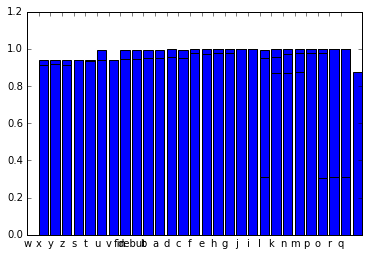

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

for i in range(27):
    symbole=dic.get(str(i+1))
    plt.bar(range(len(dic)),np.cumsum(bigramenglish[i,:]))
    """plt.title("Fonction de repartition du symbole suivant pour",symbole)"""
    plt.xticks(range(len(dic)),dic.values())
    plt.bar(dic,np.cumsum(bigramenglish[i,:]))


In [5]:
#la fonction mot imprime la suite de caractère les uns à la suite des autres jusqu'à constituer trouver le symbole de fin de mot.
mot()

mot(symbole="t")

debut
o
w
o
r
fin
t
h
e
f
i
e
fin


### I.2.c Générer une phrase
On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29) dont la
probabilité de transition vers cet état depuis un état final de mot est 0.1. Modifier la matrice de
transition en conséquence. Donner des exemples de phrases générées.

In [6]:
dic['29']="endofphrase"
print(dic)

{'24': 'w', '25': 'x', '26': 'y', '27': 'z', '20': 's', '21': 't', '22': 'u', '23': 'v', '28': 'fin', '29': 'endofphrase', '1': 'debut', '3': 'b', '2': 'a', '5': 'd', '4': 'c', '7': 'f', '6': 'e', '9': 'h', '8': 'g', '11': 'j', '10': 'i', '13': 'l', '12': 'k', '15': 'n', '14': 'm', '17': 'p', '16': 'o', '19': 'r', '18': 'q'}


In [7]:
# On ajoute une colonne endofphrase qui ajoute une probabilité de l'état fin de phrase après un symbole. Cette probabilité est de 0.1
new_bigramenglish=(np.hstack((bigramenglish,np.array([[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1],[0.1]]))))

In [8]:
# Il faut normaliser les probabilités par ligne car avec l'ajout de la colonne endofphrase elles ne sommes plus à 1
# Attention avec cette normalisation la probabilité de fin de phrase après chaque symbole ne sera pas de 0.1 comme 
#demandé dans l'énoncé nous en avons conscience mais ne voulons pas passer de temps à construire un modèle pour 
# atteindre parfaitement cette probabilité qui n'est pas l'essentiel 
from sklearn.preprocessing import normalize
new_bigramenglish = normalize(new_bigramenglish, axis=1, norm='l1')

In [9]:
np.sum(new_bigramenglish,axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

In [10]:
#On écrit la fonction qui génère les phrase   
def phrase (symbole='debut',dic=dic,bigram=new_bigramenglish):
    print(symbole)
    symb_suivant='None'
    i=0
    while i<28:
    #for i in range(28):
            
            
            if dic.get(str(i+1))==symbole:
                tirage=np.random.random()
                #print("tirage vaut",tirage,"i vaut",i)
                for j in range(30):
                    if tirage<=np.sum(new_bigramenglish[i,0:j]):
                        symb_suivant=dic.get(str(j))
                        #print("j vaut",j)
                        print(symb_suivant)
                        break
                
                symbole=symb_suivant
                i=0
            else:
                i+=1
            
            if symbole=="fin":
                symbole="debut"
                
            if symbole=="endofphrase":
                break
                
    return None

In [11]:
phrase()

debut
t
i
g
h
e
endofphrase


### I.3 Reconnaissance de la langue
Calculer la vraisemblance de la phrase « to be or not to be » (multiplier les probabilités de
transition) en fonction du modèle de langue, anglaise et française. De même calculer la
vraisemblance de “etre ou ne pas etre” suivant les deux modèles. Charger la matrice des
transitions entre caractères pour le français.

In [12]:
bigramfrancais=np.loadtxt('bigramfrancais.txt')
np.shape(bigramfrancais)

(28, 28)

In [13]:
#On multiplie les valeurs des transitions correspondants aux successions de symboles, sans oublier Debut et Fin apres chaque mot et la fin de phrase apres le dernier fin
vraissemblanceenglish_tobeornottobe=bigramenglish[0,21]*bigramenglish[21,16]*bigramenglish[16,28]*bigramenglish[0,2]*bigramenglish[2,6]
*bigramenglish[6,28]*bigramenglish[0,16]*bigramenglish[16,19]*bigramenglish[19,28]*bigramenglish[0,15]*bigramenglish[15,16]*
bigramenglish[16,21]*bigramenglish[21,28]*bigramenglish[0,21]*bigramenglish[21,16]*bigramenglish[16,28]*bigramenglish[0,2]*
bigramenglish[2,6]*bigramenglish[6,28]*bigramenglish[28,29]
#Pour calculer n'importe quelle probabilité de succesion de symbole il suffit de réaliser la même procédure.

SyntaxError: invalid syntax (<ipython-input-13-87620d2ff21b>, line 3)

In [14]:
print(dic)

{'24': 'w', '25': 'x', '26': 'y', '27': 'z', '20': 's', '21': 't', '22': 'u', '23': 'v', '28': 'fin', '29': 'endofphrase', '1': 'debut', '3': 'b', '2': 'a', '5': 'd', '4': 'c', '7': 'f', '6': 'e', '9': 'h', '8': 'g', '11': 'j', '10': 'i', '13': 'l', '12': 'k', '15': 'n', '14': 'm', '17': 'p', '16': 'o', '19': 'r', '18': 'q'}


### II.1 Introduction
L’objectif de cette partie est de générer des séquences d’observations suivant un modèle de
Markov Caché donné, puis de calculer la vraisemblance d’une séquence d’observations
suivant un modèle de Markov Caché donné.
Le modèle de Markov est de type discret. Les classes de caractères (classes 0, 1, 7) sont
modélisées chacune par un modèle à Q=5 états de type gauche-droite. Les états 1 et 5
correspondent à des colonnes de pixels de type fond de l’image (niveau 0). Les états 2, 3 et 4
correspondent au début, milieu et fin du caractère respectivement. Les transitions entre états
sont indiquées dans la matrice de transitions A de taille QxQ. Les vecteurs π sont tous égaux à
π=(1 0 0 0 0). Les séquences d’états commencent donc toujours par l’état q1=1.

Les séquences d’observations sont discrètes et issues d’images de chiffres de la base MNIST.
Les séquences d’observations consistent en séquences d’index (symboles) des éléments du
dictionnaire. Ce dictionnaire est stocké sous forme matricielle (matrice v) dans le fichier
matrice_symboles. L’élément numéro i d’une séquence d’observations correspond au
symbole i et donc à la colonne i de la matrice v. Un symbole correspond à une configuration
de colonne de 5 pixels (binaires : noir/blanc). Il y a 25=32 configurations, et donc symboles
possibles.
Une séquence d’observations correspondant à l’image simplifiée de la fig. 1 est :
[1 1 1 1 1 1 14 23 23 27 18 18 18 12 12 12 12 12 12 12 23 23 23 14 4 1 1 1]
La concaténation des éléments du dictionnaire correspondant aux index de la séquence
d’observations peut être visualisée sous forme d’image en remplaçant chaque index par le
vecteur de pixels correspondant dans le dictionnaire (Fig. 2).

Les probabilités des observations dans chaque état sont indiquées dans la matrice B (32
lignes, 5 colonnes).

### II.2 Génération de séquences d'observations
Les matrices A0.txt, B0.txt, vect_p0.txt contiennent les matrices A, B, et le vecteur π
correspondant au modèle de Markov caché du chiffre 0. Le fichier matrice_symboles.txt
contient le dictionnaire. Charger ces fichiers depuis le site pédagogique.
A quoi correspondent les zéros de la matrice B ? et ceux de la matrice A et du vecteur
π ?

In [15]:
A0=np.loadtxt('data_txt_compact/A0.txt')
B0=np.loadtxt('data_txt_compact/B0.txt')
vect_pi0=np.loadtxt('data_txt_compact/vect_pi0.txt')
matrice_symboles=np.loadtxt('data_txt_compact/matrice_symboles.txt')

In [24]:
A0

array([[ 0.84178118,  0.15821882, -0.        , -0.        , -0.        ],
       [-0.        ,  0.7886163 ,  0.2113837 , -0.        , -0.        ],
       [-0.        , -0.        ,  0.86339743,  0.13660257, -0.        ],
       [-0.        , -0.        , -0.        ,  0.79150194,  0.20849806],
       [-0.        , -0.        , -0.        , -0.        ,  1.        ]])

Les zéros des matrices A, B et pi correspondent à des probabilités nulles pour les états correspondants. Par exemple les zéros du vecteur pi0 correspondent à la probabilité nulle pour les états 2,3,4,5. L'état 1 a une probabilité de 1 (donc colonne de pixel de type fond de l'image niveau 0).

Ecrire une fonction etat_suivant qui génère un état qt+1(à t+1) à partir de l’état courant qt
(à t) à l’aide de la matrice de transitions et de la fonction de répartition cumsum.
Afficher la fonction de répartition pour une ligne de la matrice de transition et expliquer son
rôle pour la génération de l’état à t+1.

In [79]:
def etat_suivant (etat=vect_pi0,A=A0):
    etat_suivant=np.zeros(5)
    for i in range(5):
        if etat[i]==1:
            #print("i vaut",i)
            tirage=np.random.random()
            for j in range(5):
                #print("j vaut",j)
                if tirage<=np.sum(A[i,0:j]):
                    etat_suivant[j-1]=1
                    #print("somme vaut",np.sum(A[i,0:j]))
                    #print("j vaut",j)
                    break
    return etat_suivant

In [81]:
#La fonction passe à 1 l'état 1,2,3,4 ou 5 en fonction du tirage aléatoire et de la matrice de transition A0.
#Dans notre cas en utilisant vect_pi0 on observe que les 2 possibilités dans la matrice de transitions sont de rester
#à l'état 1 ou de passer à l'état 2.
etat_suivant()

array([ 1.,  0.,  0.,  0.,  0.])

ValueError: axis(=1) out of bounds

Générer une séquence d’observations suivant le modèle de Markov Caché du chiffre 0.
On commencera par générer une séquence d’états suivant ce modèle à l’aide de la fonction
etat_suivant. Puis on générera la séquence d’observations par le même procédé.

Visualiser le résultat sous forme d’image. Générer des séquences pour le chiffre 7 et le
chiffre 1 (matrices B1.txt, B7.txt, etc…)

### II.3 Calcul de la vraisemblance de séquences d’observations
Les fichiers SeqTest0.txt, SeqTest1.txt, SeqTest7.txt contiennent chacun 10 séquences
d’observations de chiffres des 3 classes 0, 1 et 7, disposés en ligne. Le script suivant extrait la
5ème observation de la 3ème séquence des chiffres 0.
Calculer la vraisemblance de ces séquences suivant chacun des modèles (0, 1 et 7) par
l’algorithme de Viterbi (on pourra implémenter la version logarithmique de cet algorithme).
Pour cela les matrices A, B et π seront converties en logarithmes (utiliser np.log).

Donner le résultat de la classification des images de test en considérant un problème à
trois classes : 0, 1 et 7.